In [1]:
%matplotlib inline
import sys
sys.path.append('./opmap/opmap/')

In [2]:
from RawCam import RawCam
from VmemMap import VmemMap
from PhaseMap import PhaseMap
from PhaseVarianceMap import PhaseVarianceMap

## Parameters

In [3]:
path = "/mnt/recordings/ExperimentData/20161019-2/C001H001S0012/"
cam_type = "sa4"
image_width = 512
image_height = 512
frame_start = 0 
frame_end = 500 # end frame (-1:all)

In [4]:
showFrame = 230

## RawCam

In [5]:
cam = RawCam(
    path,cam_type,
    image_width, image_height,
    frame_start, frame_end
)

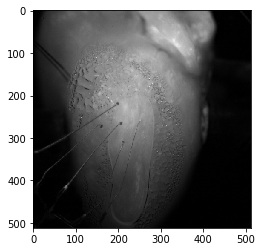

In [ ]:
cam.showFrame(showFrame)

## VmemMap

In [ ]:
vmem = VmemMap(cam)
vmem.showFrame(showFrame)

In [ ]:
vmem.smooth(9)
vmem.showFrame(showFrame)

In [ ]:
vmem.setDiffRange(diff_min=60, diff_max=200)
vmem.setRectROI(top=100)
vmem.showROI()

## PhaseMap

In [ ]:
pmap = PhaseMap(vmem)
pmap.showFrame(showFrame)

In [ ]:
pmap.showROI()

In [ ]:
pmap.morphROI(closing=10)
pmap.morphROI(erosion=10)
pmap.setRectROI(top=10)
pmap.showROI()

In [ ]:
pmap.smooth(size=9)
pmap.showFrame(showFrame)

## PhaseVarianceMap

In [ ]:
pvmap = PhaseVarianceMap(pmap, size=9)
pvmap.morphROI(erosion=9)
pvmap.showFrame(showFrame)